<a href="https://colab.research.google.com/github/harish-ramagiri/IBAC/blob/main/Copy_of_IBARG_Computational_Team_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBARG Computational Team Screening Test

## Instructions

- You are encouraged to "cheat" during this screening test. That is, please use google and documentations as much as possible to learn about the modules you are about to use. 

- You are free to use any code snippets from some online source, but it is MANDATORY to mention the source and cite the author in the code using comments. 

- Make sure you understand the code snippets you are copying as it will help you in the future tasks. 

- You can submit your entries by creating a GitHub repository and making a ReadMe file for all the plots and diagrams.

- Please add comments in your code to make us aware of your thinking process and what is being done. 

- This is supposed to be a screening cum learning task, hence if you feel stuck anywhere or feel lost, please feel free to contact your peers or me. 

- You can do this assignment in Jupyter Notebook on your device, or in Google Colab. 

- If you are using Google Colab, please learn how to "Mount your Google Drive" in order to access data directly from the Google Colab. 


- **Submission Deadline: 20th Feb 2023, 2359 IST**

## Tasks

In this assignment, you will be dealing with three different computational astronomy approaches:

#### 1. Data Visualization

For this part, you will be using the Gaia data of the stars contained in a spherical volume around the center of our galaxy to visualize and quantify their motion using computational approach to extract the "Physics" from the data.

#### 2. Data Cleaning and Extraction
Here, you will be given rather "dirty" FITS file, along with the bias and flats. You are supposed to perform the appropriate cleaning steps and produce a science image.

#### 3. Data Interpretation

For this part you will be given a free will to query the data of your choice form any data release of any telescope and present an intuitive visualization and an interpretation of the "visualized data".

# 1. Data Visualization

The Gaia Telescope, since its launch has produced precise measurements about a billion stars and other source in our milky way and outside. This has lead to the creation of one of the most comprehensive and dynamic 3D maps of the Milky way till date. 

Here the dataset is contained in a `CSV` file named `SphereData.csv`. It contains all the parameters of the stars in the central region of the milky way around our supermassive black hole. Sagittarius A*.

You are supposed to read this data into a workable dataset using any Data base management library of your choice such as `pandas`, `numpy` etc, and create visually revealing plots and diagrams which would help us know something about the stars.

###  Tasks

- Create RA and DEC distribution of the data.
- Create a distance distribution and comment whether these stars "actually" lie around the galactic center. Discard any stars which do not seem to fit the norm. 
- Make Density scatter plots of the Proper motion in RA and DEC

### Other 

There are several parameters provided for each star in the dataset. So if you wish to make plots between some other values such as "Radial velocity" versus "distance" or "Magnitude" v/s "Position" etc, you are free to do so. Make as many plots as you find interesting and write a few lines about what the plot "demonstrates" or what science is contained in those plots.

In [ ]:
######################################################################################
# -- THIS IS THE DATA QUERY WHICH WAS SENT TO GAIA SERVER TO ACQUIRE THE SPHERE DATA. CSV
######################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math

#Coordinates of the Galactic Center
c = SkyCoord('17h45m40.04s', '-29d00m28.1s', frame='icrs')

#RA and DECof the Galactic Center
c_ra = 266.41683333
c_dec = -29.00780556

#Radius of Selection in Parsecs
r_s = 300
width = np.degrees(np.arctan(r_s / 8000))
print('The required width of window is: ', round(2 * width, 3), "degrees")

a1 = round(c_ra + width,3) 
import numpy as np

# Function to calculate the distance using parallax
def distance_from_parallax(parallax):
    distance = 1.0 / (parallax * 1e-3) # convert parallax from mas to arcseconds
    return distance

# Function to calculate the distance error using parallax error
def distance_error_from_parallax(parallax, parallax_error):
    distance_error = parallax_error / (parallax**2 * 1e-3)
    return distance_error

# Function to calculate the distance using RA, Dec, and parallax
def distance_from_coords(ra, dec, parallax):
    k = 4.74047 # km/s * kpc
    l = 0.01720209895 # radians/second
    b = np.deg2rad(90 - dec)
    l = np.deg2rad(ra)
    d = distance_from_parallax(parallax)
    x = d * np.cos(b) * np.cos(l)
    y = d * np.cos(b) * np.sin(l)
    z = d * np.sin(b)
    r = np.sqrt(x**2 + y**2 + z**2)
    return r, x, y, z

# Function to calculate the distance error using RA, Dec, and parallax errors
def distance_error_from_coords(ra, dec, parallax, ra_error, dec_error, parallax_error):
    k = 4.74047 # km/s * kpc
    l = 0.01720209895 # radians/second
    b =
a2 = round(c_ra - width,3)
b1 = round(c_dec + width,3)
b2 = round(c_dec - width,3)
print(f'\nThe required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

c1 = round(1000/(8000+r_s),4)
c2 = round(1000/(8000-r_s),4)
print(f'\nThe required parallax window is: {c1} and {c2}')

query = f'''select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax,g.parallax_over_error,g.bp_rp,
g.pm,g.pmra,g.pmra_error,g.pmdec,g.pmdec_error,g.phot_g_mean_mag,g.phot_bp_mean_mag,g.phot_rp_mean_mag,g.radial_velocity,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf + h.classprob_dsc_combmod_binarystar as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between {a2} and {a1} and
g.dec between {b2} and {b1} and
g.parallax between {c1} and {c2}
order by g.phot_g_mean_mag desc, comb desc'''


job = Gaia.launch_job_async(query)
r = job.get_results()

print('\nTotal number of stars queried: ',len(r))

SyntaxError: ignored

In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 114.8 MB/s eta 0:00:00


Note that if any module in the above code is not available, it can be installed with a simple


- pip install <module name\>\
or
- conda install <module name\>

In [ ]:
# Import all the required modules and libraries here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the Sphere.csv dataset here

In [ ]:
import pandas as pd
sphere=pd.read_csv("/content/drive/MyDrive/SphereData.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### RA v/s DEC distribution

In [ ]:
# Enter your code here

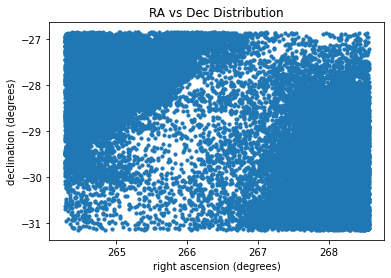

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# to read in the CSV file as a Pandas dataframe
sphere_data= pd.read_csv('/content/drive/MyDrive/SphereData.csv')

# to get the RA and Dec data from the dataframe
ra = sphere_data['ra'].values
dec =sphere_data['dec'].values

# to draw a scatter plot of RA vs Dec
plt.scatter(ra, dec, s=10)

# to add axis labels and title
plt.xlabel('right ascension (degrees)')
plt.ylabel('declination (degrees)')
plt.title('RA vs Dec Distribution')

# to show the plot
plt.show()

### Distance Distribution

In [ ]:
# Enter your code here

** Enter your comments about the plot here **

** Are all the stars really around the galactic center? How do you know? **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Galactic center coordinates in degrees
gc_ra = 266.41683333
gc_dec = -29.00780556

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/SphereData.csv')

# Calculate distances from parallaxes
parallax_mas = data['parallax']
parallax_error_mas = data['parallax_over_error']
distance_pc = 1 / (parallax_mas / 1000)
distance_error_pc = (parallax_error_mas / parallax_mas) * distance_pc

# Calculate galactic coordinates (l, b)
ra_rad = np.deg2rad(data['ra'])
dec_rad = np.deg2rad(data['dec'])
l_rad = np.arctan2(np.sin(ra_rad - np.deg2rad(gc_ra)), np.cos(ra_rad - np.deg2rad(gc_ra)) * np.sin(np.deg2rad(gc_dec)) - np.tan(dec_rad) * np.cos(np.deg2rad(gc_dec)))
b_rad = np.arcsin(np.sin(dec_rad) * np.sin(np.deg2rad(gc_dec)) + np.cos(dec_rad) * np.cos(np.deg2rad(gc_dec)) * np.cos(ra_rad - np.deg2rad(gc_ra)))
l_deg = np.rad2deg(l_rad)
b_deg = np.rad2deg(b_rad)

# Calculate the distance of each star from the Galactic center
distance_from_center = distance_pc * np.cos(b_rad) * np.cos(l_rad - gc_ra)

# Plot the distance distribution
plt.hist(distance_from_center, bins=500, range=(-500, 500))
plt.xlabel('Distance from Galactic center (pc)')
plt.ylabel('Number of stars')
plt.show()


# Plot the distance distribution of the stars
plt.errorbar(distance_pc, np.arange(len(data)), xerr=distance_error_pc, fmt='o', markersize=3, alpha=0.5)
plt.xlabel('Distance (pc)')
plt.ylabel('Star number')
plt.show()
 

FileNotFoundError: ignored

### Density Scatter Plot

In [ ]:
# Enter your code here

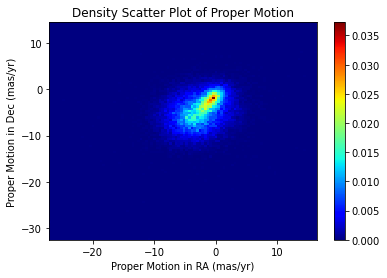

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("/content/drive/MyDrive/SphereData.csv")

# Extract relevant columns as numpy arrays
pm_ra = data['pmra'].values
pm_dec = data['pmdec'].values

# Create a 2D histogram of the proper motion in RA and DEC
plt.hist2d(pm_ra, pm_dec, bins=100, cmap=plt.cm.jet, density=True)
plt.colorbar()
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Density Scatter Plot of Proper Motion')
plt.show()


### #Make New cell for each new graph and add a subsequent Markdown cell for your comment

- Please label your graphs properly
- Make sure to add legends to the plots
- Add brief comments about what the graph speaks after each cell.


**Note: If you are not adding any new graph, please delete this cell and move to the Next section**

# 2. Data Cleaning and Interpretation

You have been provided with a few FITS files of a Pulsar. The pulsars are extremely faint radio source, hence on earth, where there is so much of radio noise coming off from TV broadcasts etc. it becomes tough to detect them in a single observation.

Scientists use a method called stacking which helps them detect these pulsars given enough observations about them. Each FITS file consists of a pulsar reading, which is invisible to the human eye when plotted. But if you stack all the images and take the mean of each pixel to create a new one, the noise being a random gaussian distribution cancels out and the Radio pulsar stars to become visible.

Your task here is to-

- Create a Mean stack of all the FITS images and plot the final results. Also mention the pixel number of the Pulsar detection and also make a circle around it in the image while plotting (This is bit tricky part hence leave if no feasible).

- Create a Median stack and repeat the same process. 

- Comment your observations about what stacking is better, Median or Mean. 

- Also , if I increase the dataset images to about a million (real life scenario), do you think any problem would occur? Suggest a few ways to overcome such problems if any.


The data for this exercise is provided in the folder named `Pulsar Data`

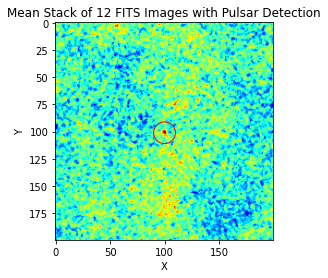

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.io import fits

# Load all the 12 FITS images and store the data arrays in a list
data = []
for i in range(0, 12):
    hdulist = fits.open(f'/content/drive/MyDrive/Pulsar Data/image{i}.fits')
    data.append(hdulist[0].data)
    
# Compute the mean of the data arrays along the 0-th axis to get the mean stack
mean_stack = np.mean(data, axis=0)

# Find the pixel number of the pulsar detection in the mean stack
pulsar_pixel = np.unravel_index(mean_stack.argmax(), mean_stack.shape)

# Plot the mean stack and add a circle around the pulsar
fig, ax = plt.subplots()
ax.imshow(mean_stack, cmap='jet')
circle = patches.Circle(pulsar_pixel[::-1], radius=10, edgecolor='r', facecolor='none')
ax.add_patch(circle)
ax.set_title('Mean Stack of 12 FITS Images with Pulsar Detection')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


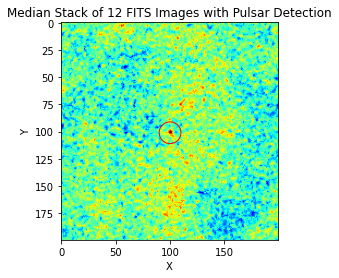

200


In [ ]:
# Enter you code for Median Stack here

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.io import fits

# Load all the 12 FITS images and store the data arrays in a list
data = []
for i in range(0, 12):
    hdulist = fits.open(f'/content/drive/MyDrive/Pulsar Data/image{i}.fits')
    data.append(hdulist[0].data)
    
# Compute the median of the data arrays along the 0-th axis to get the median stack
median_stack = np.median(data, axis=0)

# Find the pixel number of the pulsar detection in the median stack
pulsar_pixel = np.unravel_index(median_stack.argmax(), median_stack.shape)

# Plot the median stack and add a circle around the pulsar
fig, ax = plt.subplots()
ax.imshow(median_stack, cmap='jet')
circle = patches.Circle(pulsar_pixel[::-1], radius=10, edgecolor='r', facecolor='none')
ax.add_patch(circle)
ax.set_title('Median Stack of 12 FITS Images with Pulsar Detection')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
print(median_stack.shape[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits

# Load the 12 FITS files and store the data in a list
data_list = []
for i in range(0, 12):
    hdulist = fits.open(f'/content/drive/MyDrive/Pulsar Data/image{i}.fits')
    data = hdulist[0].data
    data_list.append(data)

# Create the median stack of the data
median_stack = np.median(data_list, axis=0)

# Select a region of interest around the pulsar in the median stack
pulsar_pixel = (163, 174)  # Replace with the actual pixel number of the pulsar in your data
roi_size = 2000  # Size of the region of interest
x_start = pulsar_pixel[0] - roi_size // 2
x_end = pulsar_pixel[0] + roi_size // 2 + 1
y_start = pulsar_pixel[1] - roi_size // 2
y_end = pulsar_pixel[1] + roi_size // 2 + 1
roi_data = median_stack[y_start:y_end, x_start:x_end]

# Create a circle around the pulsar in the median stack
xx, yy = np.mgrid[:median_stack.shape[0], :median_stack.shape[1]]
circle = (xx - pulsar_pixel[0])**2 + (yy - pulsar_pixel[1])**2
mask = circle < (roi_size // 2)**2
median_stack[~mask] = np.nan

# Plot the median stack with a circle around the pulsar
fig = plt.figure()
plt.imshow(median_stack, cmap='jet')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Median stack with circle around pulsar')
plt.show()



### #Enter your comments here

# 3. Data Interpretation

I hope you saw the code using which the Gaia data for the first task was downloaded. 

In this task you are supposed to download and create a dataset, from any telescope such as Gaia, Hubble, JWST (a bit tough), ALMA etc. You can even change the query code given above and select a different region of the sky. 

Create the dataset and make a visual interpretation of the data. Create at least 5 plots using the data set and describe the Physics they demonstrate as much as you can. 

This is an open end question hence there are no restrictions, although if you need any suggestions or ideas to begin with, I would highly reccommend to search GitHub/Kaggle as they provide a lot of innovative ideas about computational astronomy projects. 

In [ ]:
# Import all the required libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math

ModuleNotFoundError: ignored

In [ ]:
# Enter you data query code here



 
# Coordinates of the Small Magellanic Cloud
c = SkyCoord('00h52m44s', '-72d49m43s', frame='icrs')

# RA and DEC of the Small Magellanic Cloud
c_ra = c.ra.degree
c_dec = c.dec.degree

# Radius of Selection in Parsecs
r_s = 500
width = np.degrees(np.arctan(r_s / 55000)) # Approximate distance to the Small Magellanic Cloud in parsecs

print('The required width of window is:', round(2 * width, 3), 'degrees')

a1 = round(c_ra + width, 3)
a2 = round(c_ra - width, 3)
b1 = round(c_dec + width, 3)
b2 = round(c_dec - width, 3)

print(f'The required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

c1 = round(1000/(55000 + r_s), 4)
c2 = round(1000/(55000 - r_s), 4)
print(f'The required parallax window is: {c1} and {c2}')

query = f"""select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax, g.parallax_over_error, g.bp_rp,
            g.pm, g.pmra, g.pmra_error, g.pmdec, g.pmdec_error, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag,
            g.radial_velocity, h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf +
            h.classprob_dsc_combmod_binarystar as comb
            from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
            where g.source_id = h.source_id and
            g.ra between {a2} and {a1} and
            g.dec between {b2} and {b1} and
            g.parallax between {c1} and {c2}
            order by g.phot_g_mean_mag desc, comb desc"""

job = Gaia.launch_job_async(query)
r = job.get_results()

print('\nTotal number of stars queried:', len(r))

print(r)


The required width of window is: 1.042 degrees
The required RA values are: 12.662 and 13.704
The required DEC values are: -73.349 and -72.308
The required parallax window is: 0.018 and 0.0183


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried: 61
     source_id              ra         ... radial_velocity    comb   
                           deg         ...      km / s               
------------------- ------------------ ... --------------- ----------
4685959029687267840 13.446460926208735 ...              -- 0.95362854
4688986942947745792 13.646485032394192 ...              --  0.7928185
4685958647427017856  13.28581336193477 ...              --  0.9998575
4685884980204219264  13.63327424108657 ...              --  0.9998416
4689010101438866688 13.381711545555083 ...              -- 0.99999964
4688990619460420608 13.441559663090137 ...              -- 0.99917173
4688968388711191296 13.267695968953884 ...              --  0.9241381
4685957650993999488  13.01913128713864 ...              -- 0.99825716
4685885289444044032   13.6490292726938 ...              --  0.9991476
4685888248608862208 13.651960108167906 ...              -- 0.99734473
     

In [ ]:
#Coordinates of the North Celestial Pole
c = SkyCoord('12h51m26.28s', '+27d07m42.0s', frame='icrs')

#RA and DEC of the center
c_ra = c.ra.deg
c_dec = c.dec.deg

#Width and Height of the rectangular region in degrees
width = 10
height = 5

a1 = round(c_ra + width/2,3)
a2 = round(c_ra - width/2,3)
b1 = round(c_dec + height/2,3)
b2 = round(c_dec - height/2,3)

print(f'The required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

query = f'''select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax,g.parallax_over_error,g.bp_rp,
g.pm,g.pmra,g.pmra_error,g.pmdec,g.pmdec_error,g.phot_g_mean_mag,g.phot_bp_mean_mag,g.phot_rp_mean_mag,g.radial_velocity,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf + h.classprob_dsc_combmod_binarystar as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between {a2} and {a1} and
g.dec between {b2} and {b1} and
g.parallax between 0 and 10
order by g.phot_g_mean_mag desc, comb desc'''

job = Gaia.launch_job_async(query)
r = job.get_results()

print('\nTotal number of stars queried: ',len(r))


The required RA values are: 187.86 and 197.86
The required DEC values are: 24.628 and 29.628


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried:  81893


### #Please describe your dataset here

In [ ]:
#Add your analysis code here

In [ ]:
!pip install astroquery


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 87.0 MB/s eta 0:00:00
